In [1]:
import os
os.chdir('/home/sedreh/ITMO/semester3/Molecular_phylogenetic/homework_5/homework_5/iqtree_output')

##### 1. Build an ML tree (500 bootstrap replicates) for the whole sequence using RAxML or IQ-Tree with GTRCAT model.
I will try both RAxML and IQ-Tree to build the trees.
Also in homeworks i used different ways of drawing tree ro learn!

RAxML (Randomized Axelerated Maximum Likelihood) is a program for sequential and parallel
Maximum Likelihood based inference of large phylogenetic trees. It can also be used for postanalyses of sets of phylogenetic trees, analyses of alignments and, evolutionary placement of short
reads

###### RAxML

#finalcommand for RAxML


raxmlHPC -m GTRCAT -b 12345 -# 500 -p 12345 
-s /home/sedreh/ITMO/semester3/Molecular_phylogenetic/homework_5/data/SUP35_aln.best.fas 
-n raxmltree_500

#finalcommand for RAxML with partition


raxmlHPC -m GTRCAT -b 12345 -# 500 -p 12345 
-s /home/sedreh/ITMO/semester3/Molecular_phylogenetic/homework_5/data/SUP35_aln.best.fas 
-q /home/sedreh/ITMO/semester3/Molecular_phylogenetic/homework_5/data/partitions_for_raxml.txt 
-n raxmltree_partition

##### IQ-Tree

iqtree -s /home/sedreh/ITMO/semester3/Molecular_phylogenetic/homework_5/data/SUP35_aln.best.fas -m GTR -bb 1000 

iqtree -s /home/sedreh/ITMO/semester3/Molecular_phylogenetic/homework_5/data/SUP35_aln.best.fas -spp /home/sedreh/ITMO/semester3/Molecular_phylogenetic/homework_5/data/partitions_for_raxml.txt -m GTR -bb 1000

###### Also web version of IQtree

http://iqtree.cibiv.univie.ac.at/

###### what is the alignment file?

In [2]:
from Bio import AlignIO
aln = AlignIO.read('/home/sedreh/ITMO/semester3/Molecular_phylogenetic/homework_5/data/SUP35_aln.best.fas', 'fasta')
print (aln)

SingleLetterAlphabet() alignment with 10 rows and 2460 columns
ATGTCA------------------------------GACCAA--...AAT SUP35_Kla_AB039749
ATGTCGGAGGAAGATCAAATTCAATCGCAAGGCAACGACCAAGG...--- SUP35_Agos_ATCC_10895_NM_211584
ATGTCG------------------------------GAT-----...--- SUP35_Scer_74-D694_GCA_001578265.1
ATGTCG------------------------------GAT-----...--- SUP35_Sbou_unique28_CM003560
ATGTCG------------------------------GAT-----...--- SUP35_Scer_beer078_CM005938
ATGTCG------------------------------GAT-----...--- SUP35_Spar_A12_Liti
ATGTCT------------------------------GAT-----...--- SUP35_Smik_IFO1815T_30
ATGTCT------------------------------GAT-----...--- SUP35_Sarb_H-6_chrXIII_CM001575
ATGTCA------------------------------GAT-----...--- SUP35_Skud_IFO1802T_36
ATGTCT------------------------------GAT-----...--- SUP35_Seub_CBS12357_chr_II_IV_DF968535


In [3]:
from Bio import Phylo
iQtree_bootstrap = Phylo.read('/home/sedreh/ITMO/semester3/Molecular_phylogenetic/homework_5/homework_5/iqtree_output/bootstrap/SUP35_aln.best.fas.contree', 'newick')
print(iQtree_bootstrap)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.1516534253, name='SUP35_Kla_AB039749')
        Clade(branch_length=0.1842978575, name='SUP35_Agos_ATCC_10895_NM_211584')
        Clade(branch_length=0.1640239505, confidence=100)
            Clade(branch_length=0.0204648048, confidence=90)
                Clade(branch_length=0.0318391609, confidence=100)
                    Clade(branch_length=0.043144188, confidence=100)
                        Clade(branch_length=2.9866e-06, confidence=59)
                            Clade(branch_length=0.0004872062, name='SUP35_Scer_74-D694_GCA_001578265.1')
                            Clade(branch_length=0.0004860338, name='SUP35_Sbou_unique28_CM003560')
                        Clade(branch_length=0.0020071022, name='SUP35_Scer_beer078_CM005938')
                    Clade(branch_length=0.0287843445, name='SUP35_Spar_A12_Liti')
                Clade(branch_length=0.0620711868, name='SUP35_Smik_IFO1815T_30')
            Clade(br

In [5]:
#we will choose SUP35_Agos_ATCC_10895_NM_211584 and SUP35_Kla_AB039749 as outgroup for rooting the tree

iQtree_bootstrap.root_with_outgroup({'name': 'SUP35_Kla_AB039749'}, {'name': 'SUP35_Agos_ATCC_10895_NM_211584'}) 

Phylo.write(iQtree_bootstrap, 'rooted_iQtree_bootstrap.newick', 'newick')

1

In [8]:
#read rooted tree
rooted_iQtree_bootstrap = Phylo.read('/home/sedreh/ITMO/semester3/Molecular_phylogenetic/homework_5/homework_5/iqtree_output/bootstrap/rooted_iQtree_bootstrap.newick', 'newick')


In [9]:
print("Total branch length %0.2f" % rooted_iQtree_bootstrap.total_branch_length())

Total branch length 0.95


##### I draw the tree using ete toolkit and attached in iqtree results folder as a pdf

#### Collapse all the descendents of this tree, leaving only terminals. this will safely collapse nodes with poor bootstrap support

In [10]:
# “collapse” clades with bootstrap support < 70%. 
rooted_iQtree_bootstrap.collapse_all(lambda c: c.confidence is not None and c.confidence < 70)
print("Total branch length %0.2f" % rooted_iQtree_bootstrap.total_branch_length())

#I wrote collapesed rooted tree in new file and draw it using ete3. 
Phylo.write(rooted_iQtree_bootstrap, 'collapsed_rooted_iQtree.nwk', 'newick') 

Total branch length 0.99


1

In [11]:
#reading tree with partition file (is done with iqtree web server)
iQtree_partition = Phylo.read('/home/sedreh/ITMO/semester3/Molecular_phylogenetic/homework_5/homework_5/iqtree_output/partition/SUP35_aln.best.fas.contree', 'newick')
print (iQtree_partition)


Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.2465794068, name='SUP35_Kla_AB039749')
        Clade(branch_length=0.3123320332, name='SUP35_Agos_ATCC_10895_NM_211584')
        Clade(branch_length=0.3043830659, confidence=100)
            Clade(branch_length=0.0196157323, confidence=50)
                Clade(branch_length=0.0182767691, confidence=56)
                    Clade(branch_length=0.0341467522, confidence=97)
                        Clade(branch_length=0.0355792096, confidence=100)
                            Clade(branch_length=0.047585444, confidence=100)
                                Clade(branch_length=2.9947e-06, confidence=53)
                                    Clade(branch_length=0.000512076, name='SUP35_Scer_74-D694_GCA_001578265.1')
                                    Clade(branch_length=0.0005110835, name='SUP35_Sbou_unique28_CM003560')
                                Clade(branch_length=0.0021310603, name='SUP35_Scer_beer078_CM005938')
  

In [12]:
#Root the tree at SUP35_Kla_AB039749 and SUP35_Agos_ATCC_10895_NM_211584 as outgroup

iQtree_partition.root_with_outgroup({'name': 'SUP35_Kla_AB039749'}, {'name': 'SUP35_Agos_ATCC_10895_NM_211584'}) 

Phylo.write(iQtree_partition, 'rooted_iQtree_partition.newick', 'newick')

1

In [13]:
#reading rooted tree
rooted_iQtree_partition = Phylo.read('/home/sedreh/ITMO/semester3/Molecular_phylogenetic/homework_5/homework_5/iqtree_output/partition/rooted_iQtree_partition.newick', 'newick')
print (rooted_iQtree_partition)

Tree(rooted=False, weight=1.0)
    Clade(branch_length=0.0)
        Clade(branch_length=0.24658)
            Clade(branch_length=0.31233, name='SUP35_Agos_ATCC_10895_NM_211584')
            Clade(branch_length=0.30438, confidence=100.0)
                Clade(branch_length=0.01962, confidence=50.0)
                    Clade(branch_length=0.01828, confidence=56.0)
                        Clade(branch_length=0.03415, confidence=97.0)
                            Clade(branch_length=0.03558, confidence=100.0)
                                Clade(branch_length=0.04759, confidence=100.0)
                                    Clade(branch_length=0.0, confidence=53.0)
                                        Clade(branch_length=0.00051, name='SUP35_Scer_74-D694_GCA_001578265.1')
                                        Clade(branch_length=0.00051, name='SUP35_Sbou_unique28_CM003560')
                                    Clade(branch_length=0.00213, name='SUP35_Scer_beer078_CM005938')
              

In [14]:
print("Total branch length %0.2f" % rooted_iQtree_partition.total_branch_length())

Total branch length 1.40


In [15]:
#cutt_off <70 

rooted_iQtree_partition.collapse_all(lambda c: c.confidence is not None and c.confidence < 70)
print("Total branch length %0.2f" % rooted_iQtree_partition.total_branch_length())
Phylo.write(rooted_iQtree_partition, 'collapsed_rooted_iQtree_partition.nwk', 'newick') 

Total branch length 1.45


1

#Based on the trees constructed, describe the relationship between the taxa ​ S. cerevisiae, S. boulardii, ​ and ​ S. paradoxus ​ .

In IQtree with partition and without partition:


As we knoe phylogenetic trees illustrate degrees of relationship among taxa. In the constructed trees, Taxon S. cerevisiae and Taxon S. boulardii are more closely related to one another that either is to Taxon S. paradoxus! because they share a shallower node. It mean they have more similarity with each other than Taxon S. paradoxus. 

### As I read about using partitioning model, the choice of partitioning scheme will change the topology of the  tree. length of branches and bootstrap support are also affected by the choice of partitioning scheme. But if  all partitions have similar substitution model, the branch lengths may not be differed.

about position of outgroup based on my trees, after collapsing it is the same.

#### visualizing RAxML_tree. for more practice i did this part in R and visualize tree using Densitree

In [22]:
#Reading RAxML_tree.
from Bio import Phylo
RAXML_pure = Phylo.read('/home/sedreh/ITMO/semester3/Molecular_phylogenetic/homework_5/homework_5/RAXML/RAxML_bestTree.raxmltree_pure', 'newick')
print (RAXML_pure)


Tree(rooted=False, weight=1.0)
    Clade(branch_length=0.0)
        Clade(branch_length=0.3458628526845534, name='SUP35_Agos_ATCC_10895_NM_211584')
        Clade(branch_length=0.33429047059705164)
            Clade(branch_length=0.007575626547297922)
                Clade(branch_length=0.031881927345970514)
                    Clade(branch_length=0.07402835493614932, name='SUP35_Smik_IFO1815T_30')
                    Clade(branch_length=0.0349570157575185)
                        Clade(branch_length=0.04606946044381412)
                            Clade(branch_length=0.0019557918149693586, name='SUP35_Scer_beer078_CM005938')
                            Clade(branch_length=1.00000050002909e-06)
                                Clade(branch_length=0.00047362586657263514, name='SUP35_Scer_74-D694_GCA_001578265.1')
                                Clade(branch_length=0.00047331342081471836, name='SUP35_Sbou_unique28_CM003560')
                        Clade(branch_length=0.03178901268921656, 

## MrBayse #############################

In [16]:
# reading Mrbayse tree

from Bio import Phylo
MrBayse = Phylo.read('/home/sedreh/ITMO/semester3/Molecular_phylogenetic/homework_5/homework_5/MrBase/phylo_tree.tree', 'newick')
print (MrBayse)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.2578899, name='SUP35_Kla_AB039749')
        Clade(branch_length=0.3432715, name='SUP35_Agos_ATCC_10895_NM_211584')
        Clade(branch_length=0.3203681, confidence=1.0)
            Clade(branch_length=0.0123637, confidence=0.512)
                Clade(branch_length=0.03026675, confidence=1.0)
                    Clade(branch_length=0.03550824, confidence=1.0)
                        Clade(branch_length=0.04669551, confidence=1.0)
                            Clade(branch_length=0.0007845279, name='SUP35_Scer_beer078_CM005938')
                            Clade(branch_length=0.0007929222, name='SUP35_Sbou_unique28_CM003560')
                            Clade(branch_length=0.002235554, name='SUP35_Sc')
                        Clade(branch_length=0.03238813, name='SUP35_Spar_A12_Liti')
                    Clade(branch_length=0.07363296, name='SUP35_Smik_IFO1815T_30')
                Clade(branch_length=0.09660268, na

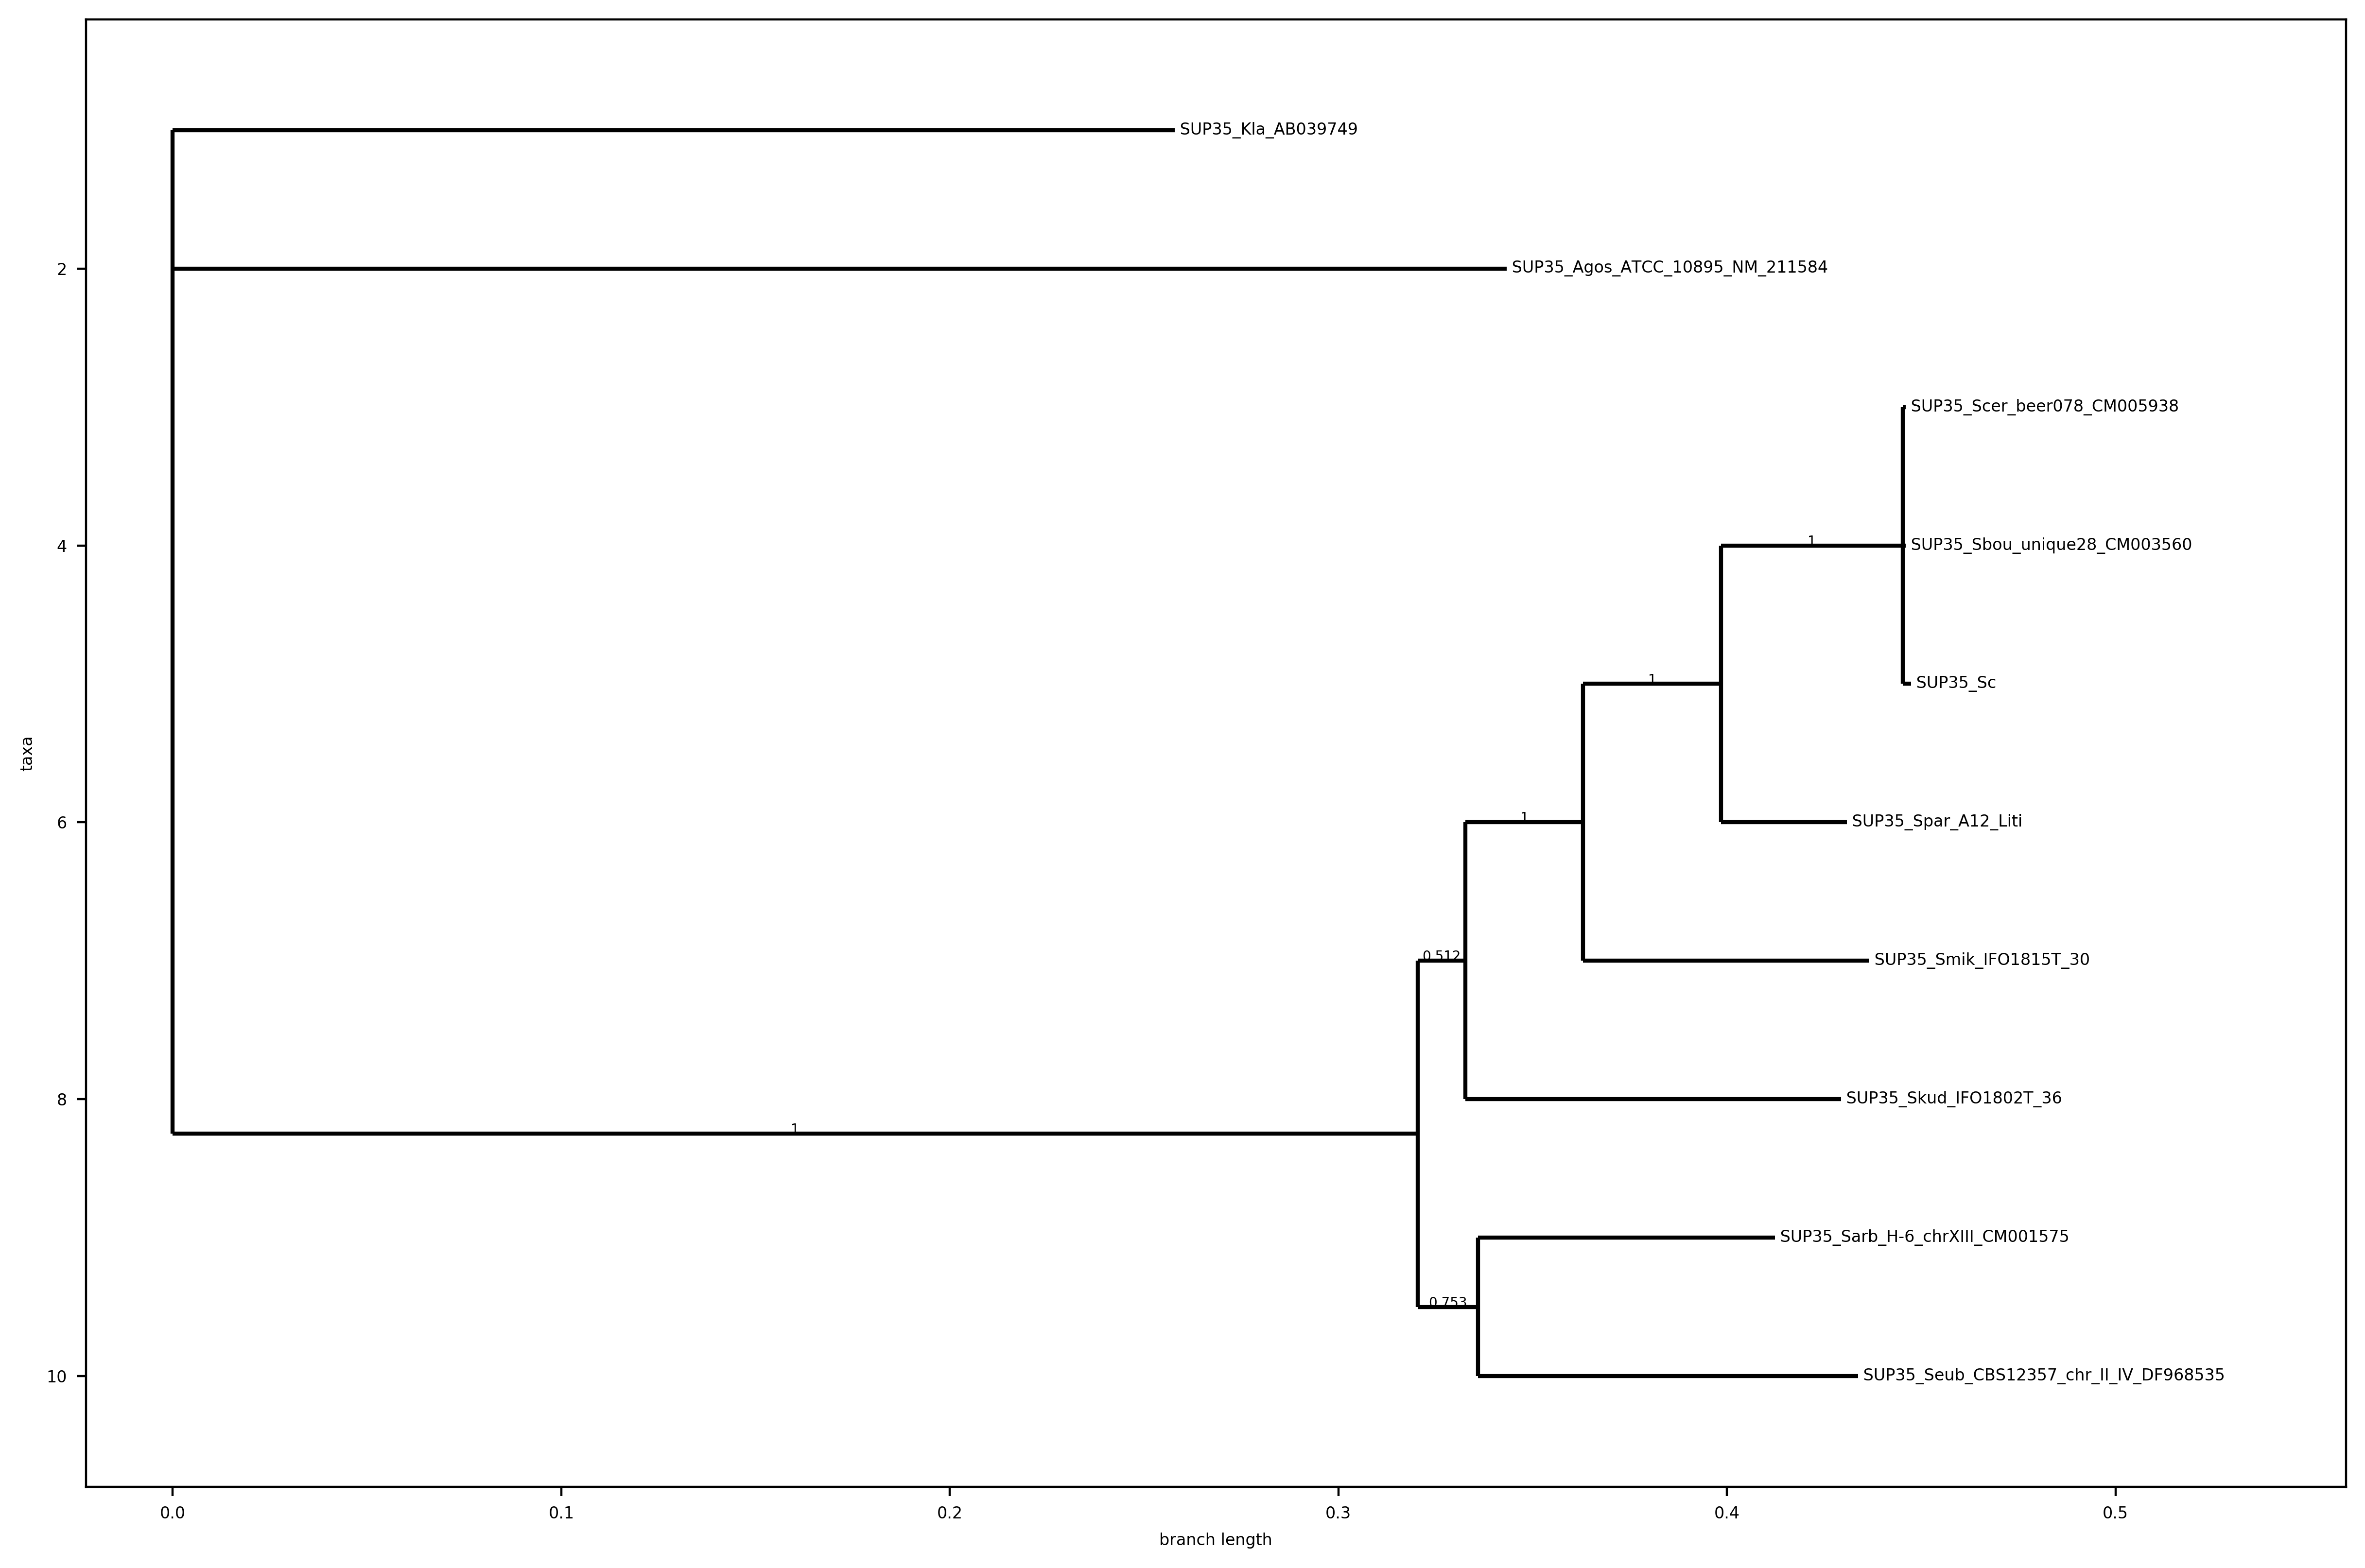

In [18]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('font', size=6) # set the size of the figure
fig = plt.figure(figsize=(15, 10), dpi=400)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(MrBayse, axes=axes)

In [20]:
#Root the MrBayse tree at SUP35_Kla_AB039749 and SUP35_Agos_ATCC_10895_NM_211584

MrBayse.root_with_outgroup({'name': 'SUP35_Kla_AB039749'}, {'name': 'SUP35_Agos_ATCC_10895_NM_211584'}) 

Phylo.write(MrBayse, 'rooted_MrBayse.newick', 'newick')

1

In [26]:
#reading rooted tree
rooted_MrBayse = Phylo.read('/home/sedreh/ITMO/semester3/Molecular_phylogenetic/homework_5/homework_5/MrBase/rooted_MrBayse.newick', 'newick')


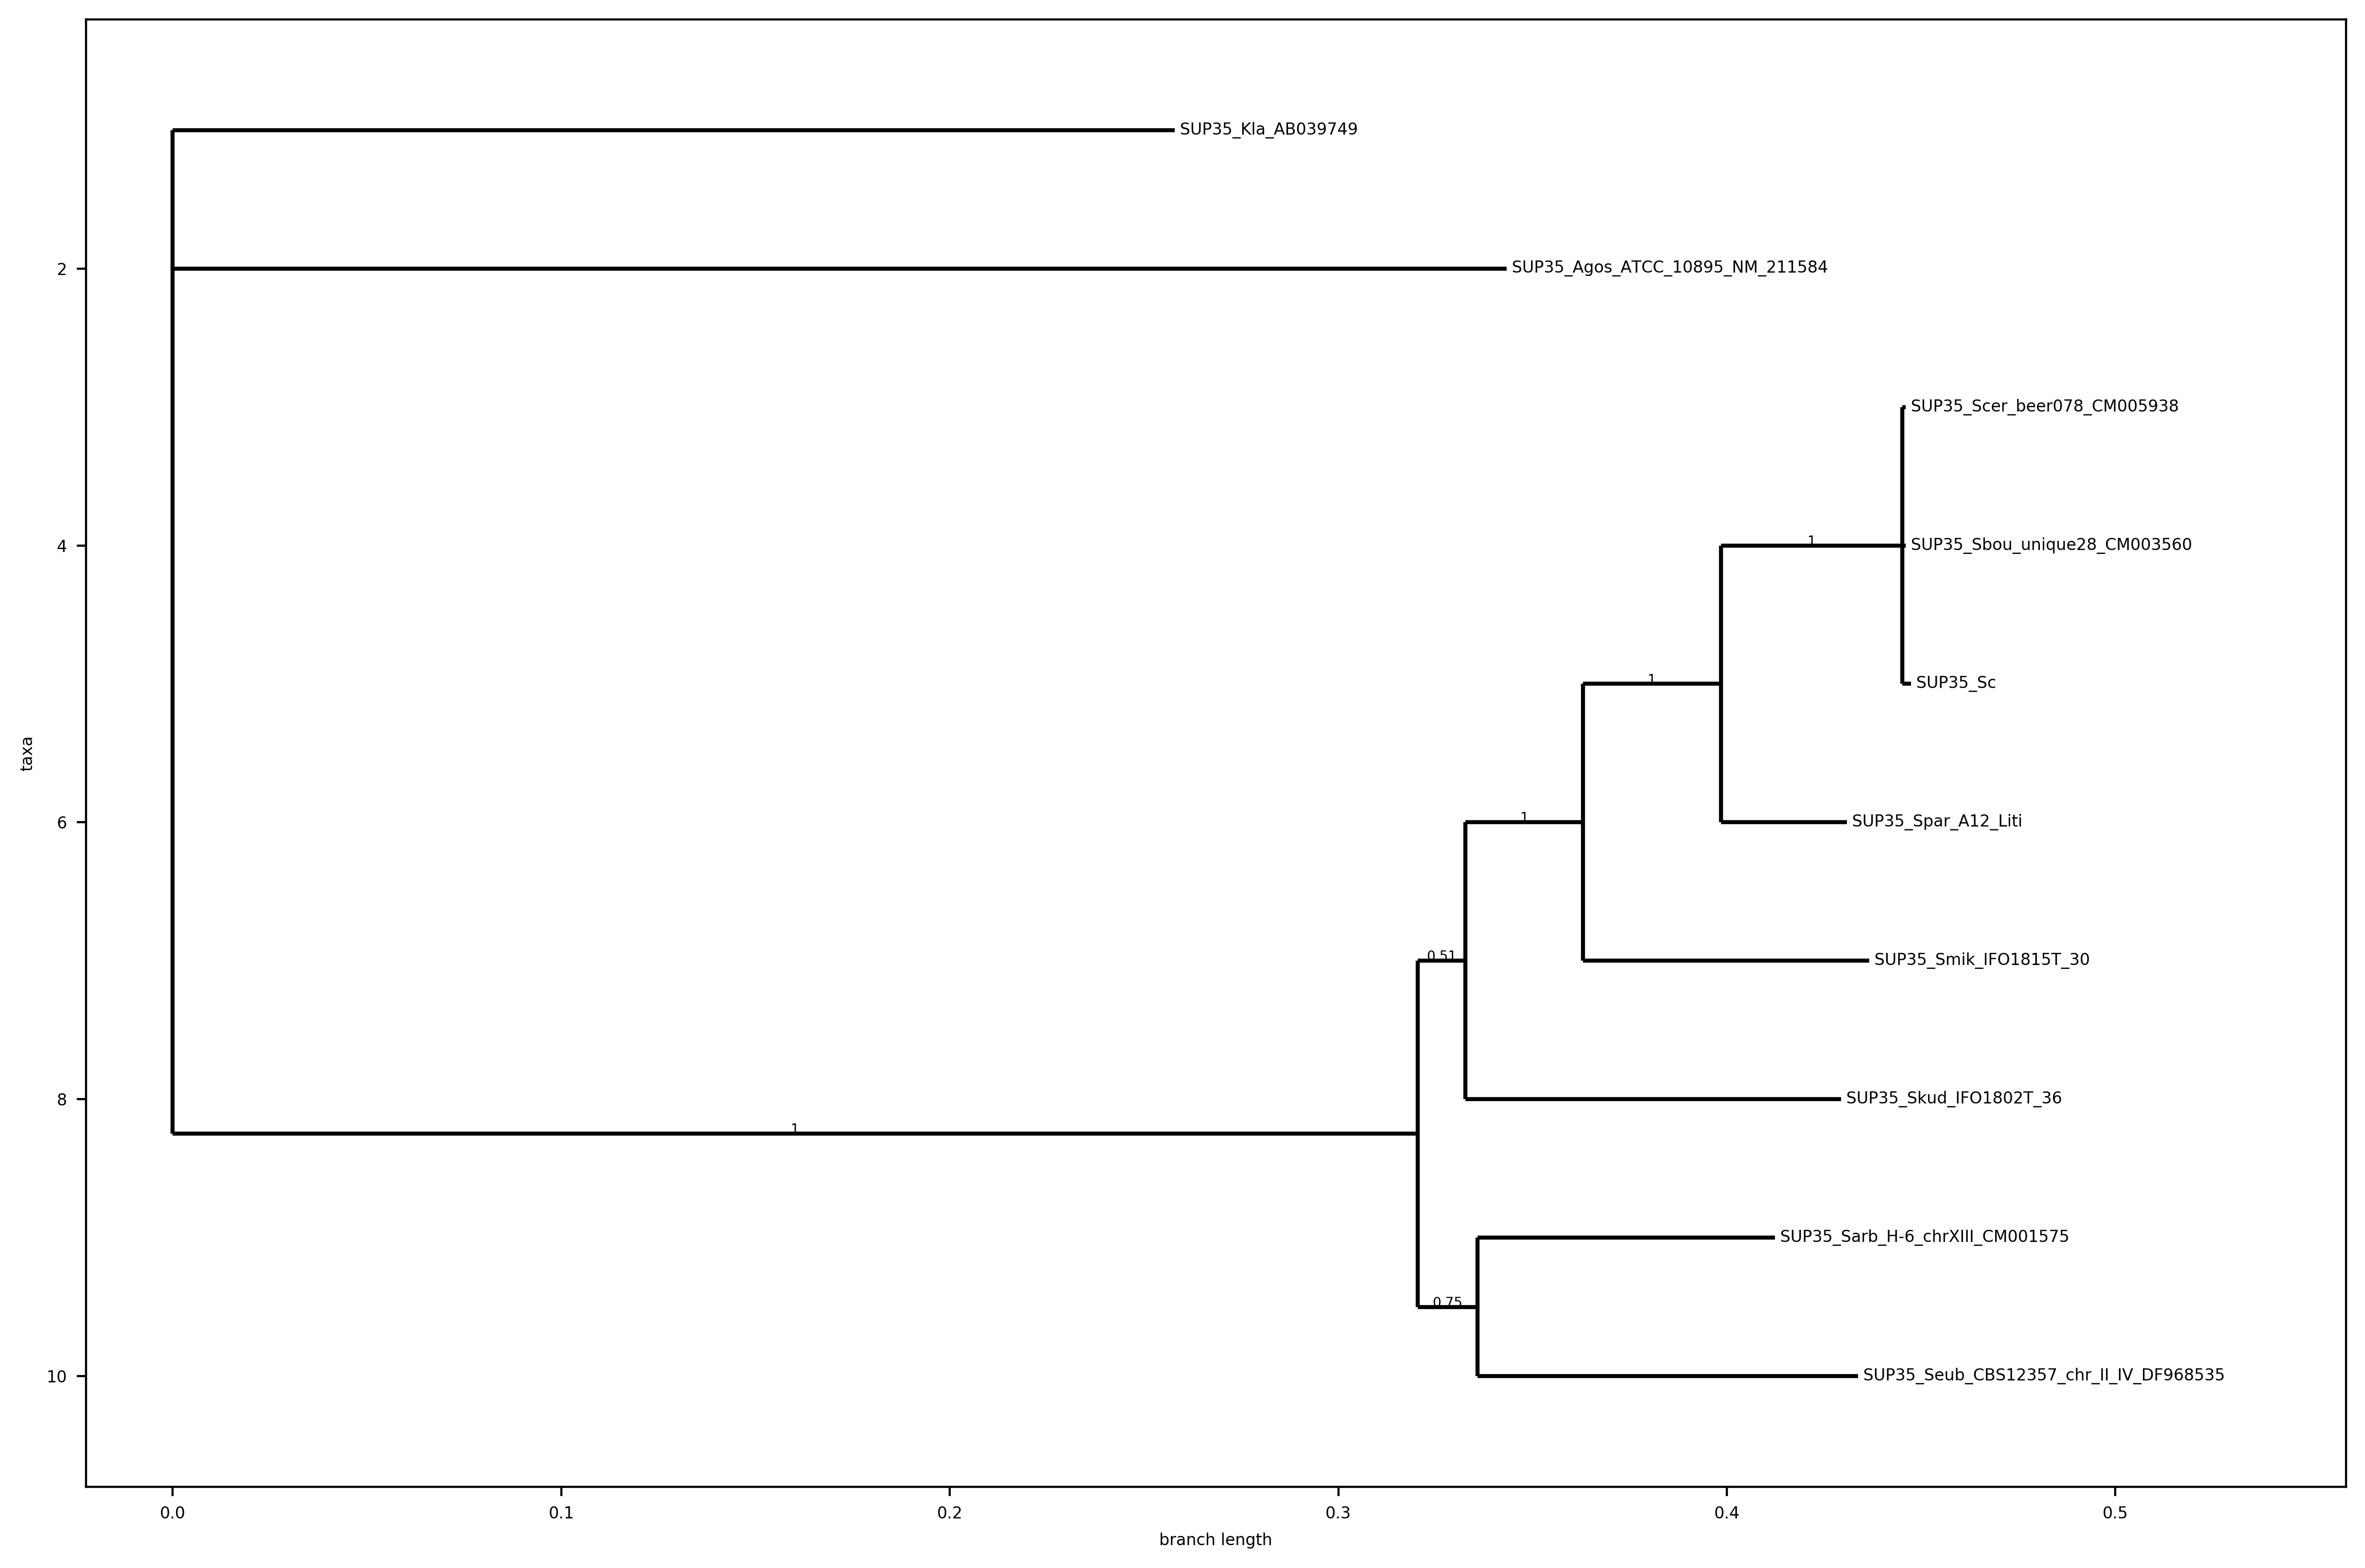

In [27]:
matplotlib.rc('font', size=6) # set the size of the figure
fig = plt.figure(figsize=(15, 10), dpi=400)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(rooted_MrBayse, axes=axes)

In [28]:
print("Total branch length %0.2f" % rooted_MrBayse.total_branch_length())

Total branch length 1.44


In [24]:

rooted_MrBayse.collapse_all(lambda c: c.confidence is not None and c.confidence < 0.7)
print("Total branch length %0.2f" % rooted_MrBayse.total_branch_length())
Phylo.write(rooted_MrBayse, 'collapsed_rooted_MrBayse.nwk', 'newick') 

Total branch length 1.46


1

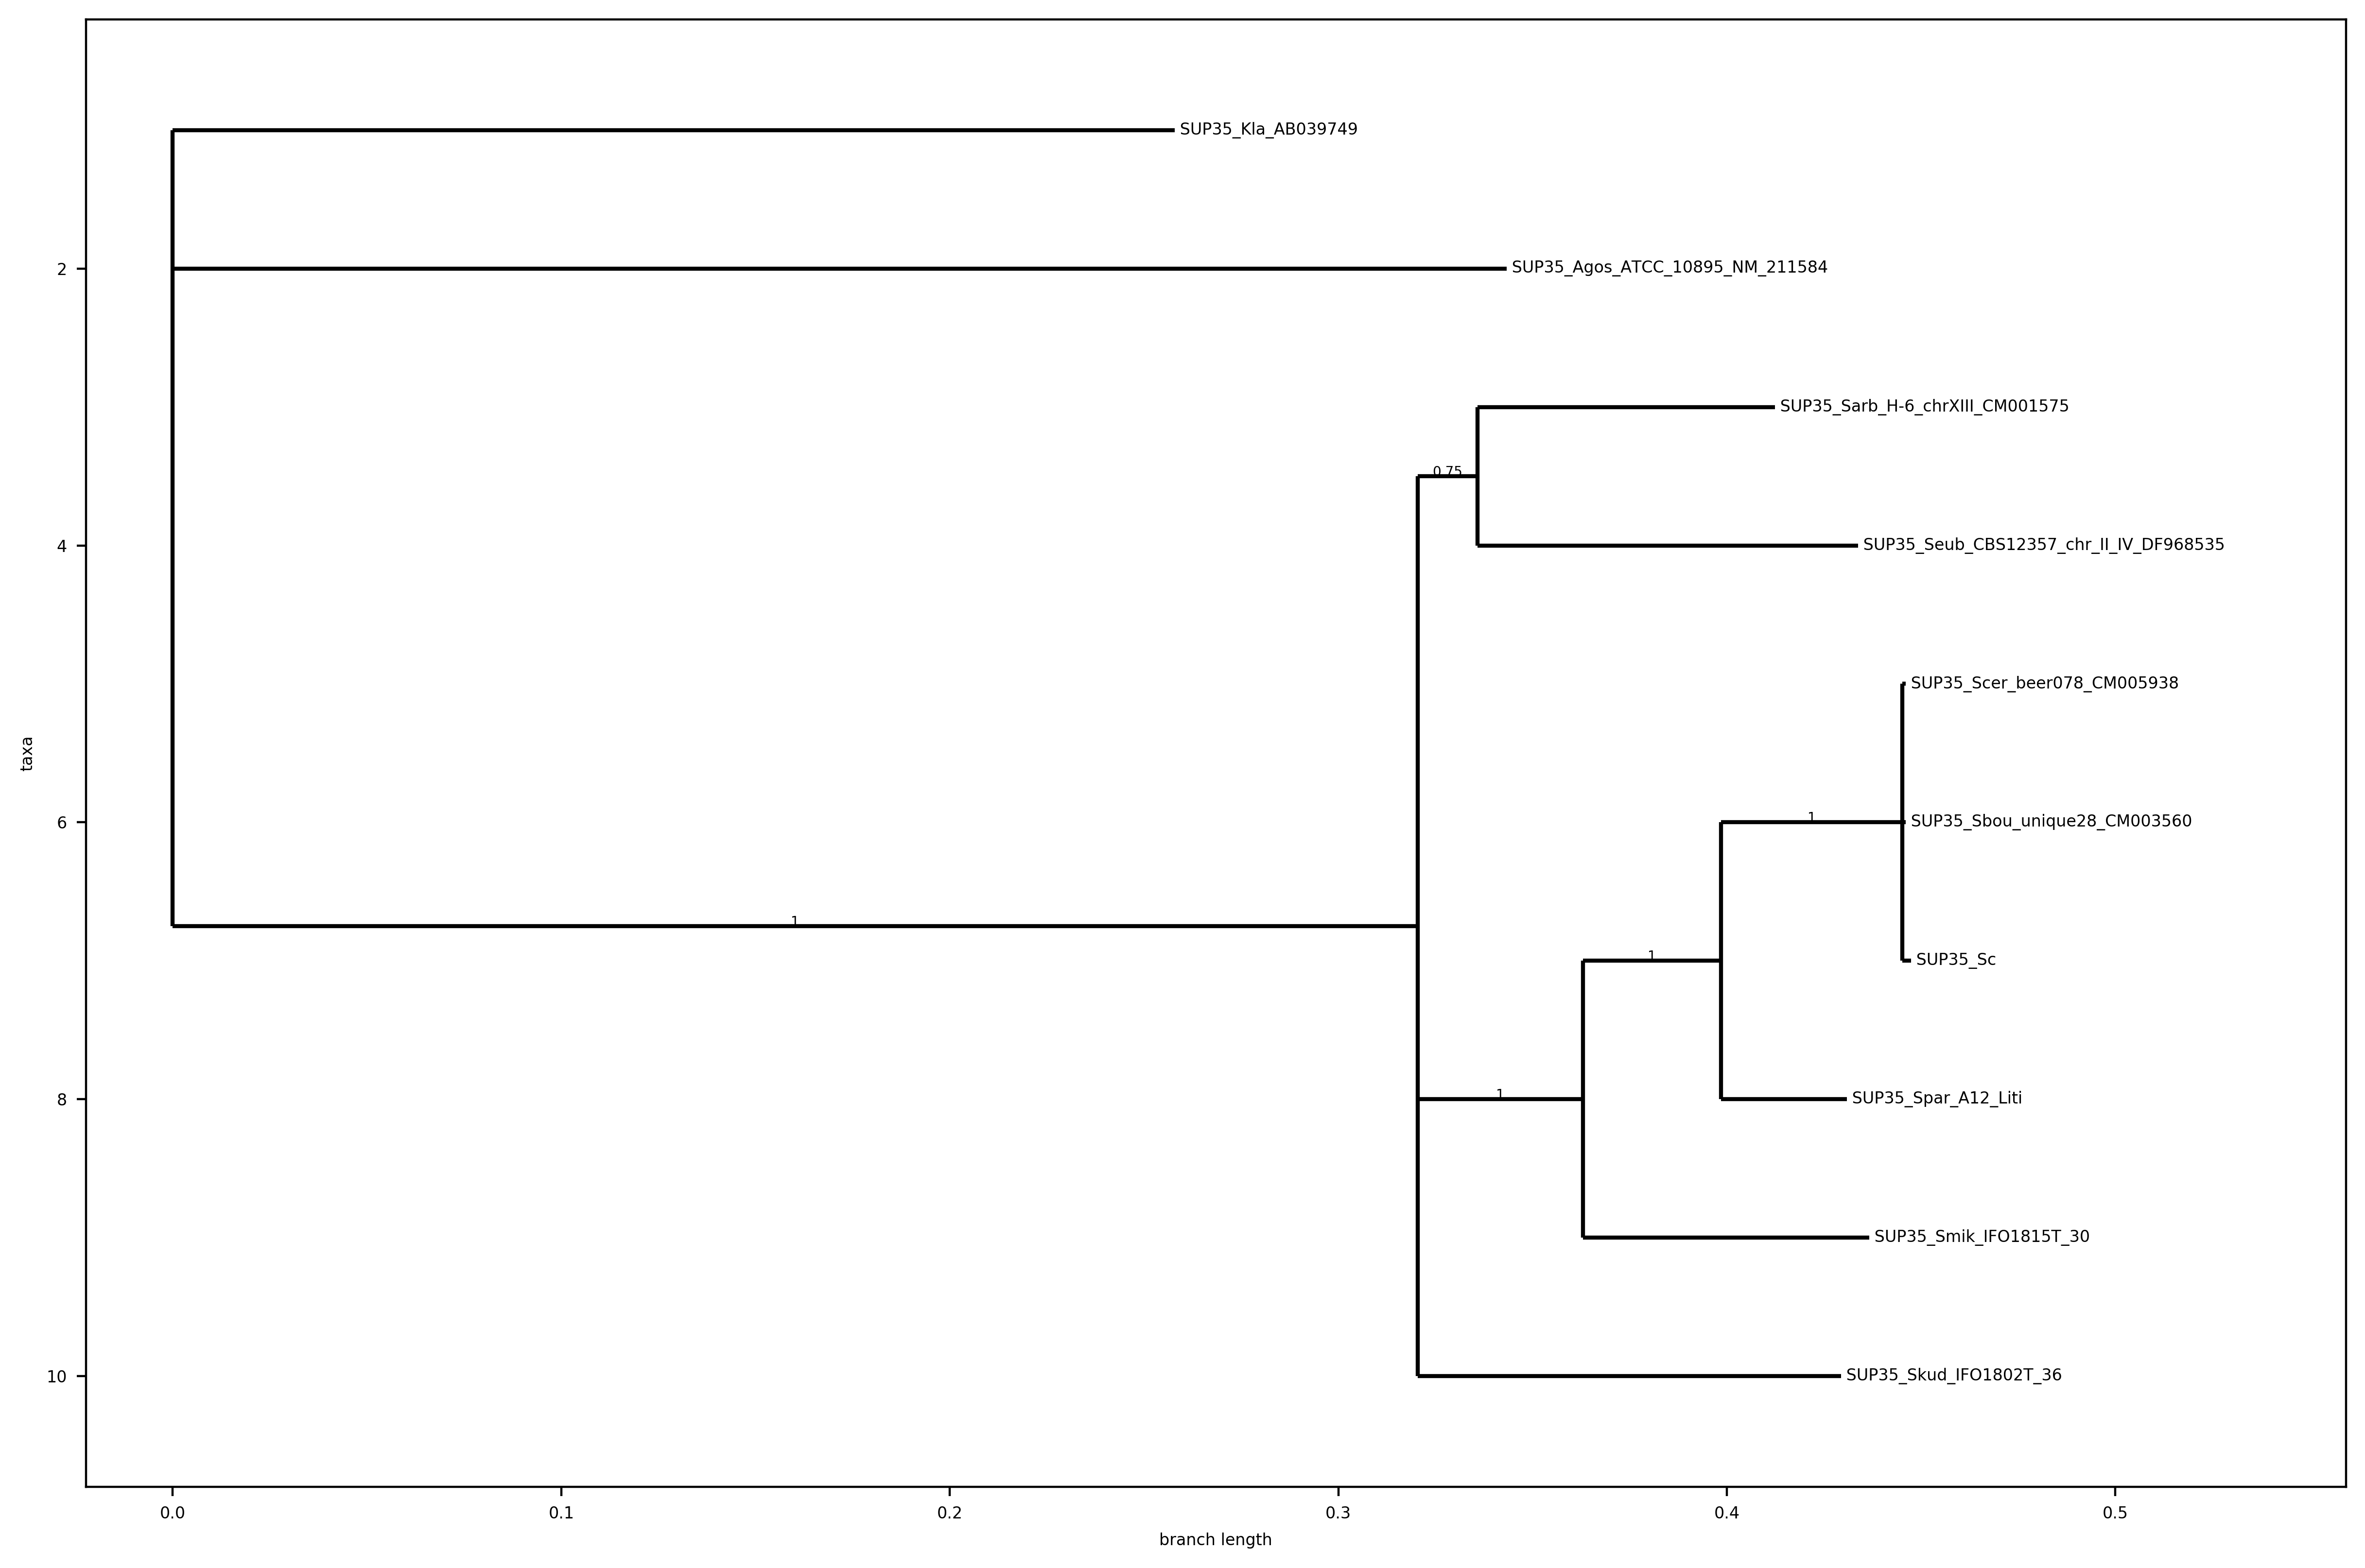

In [29]:
collapsed_MrBayse = Phylo.read('/home/sedreh/ITMO/semester3/Molecular_phylogenetic/homework_5/homework_5/MrBase/collapsed_rooted_MrBayse.nwk', 'newick')
matplotlib.rc('font', size=6) # set the size of the figure
fig = plt.figure(figsize=(15, 10), dpi=400)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(collapsed_MrBayse, axes=axes)


In [35]:
rooted_MrBayse.collapse_all(lambda c: c.confidence is not None and c.confidence < 0.8)
print("Total branch length %0.2f" % rooted_MrBayse.total_branch_length())
Phylo.write(rooted_MrBayse, 'collapsed_rooted_MrBayse_80.nwk', 'newick') 

Total branch length 1.47


1

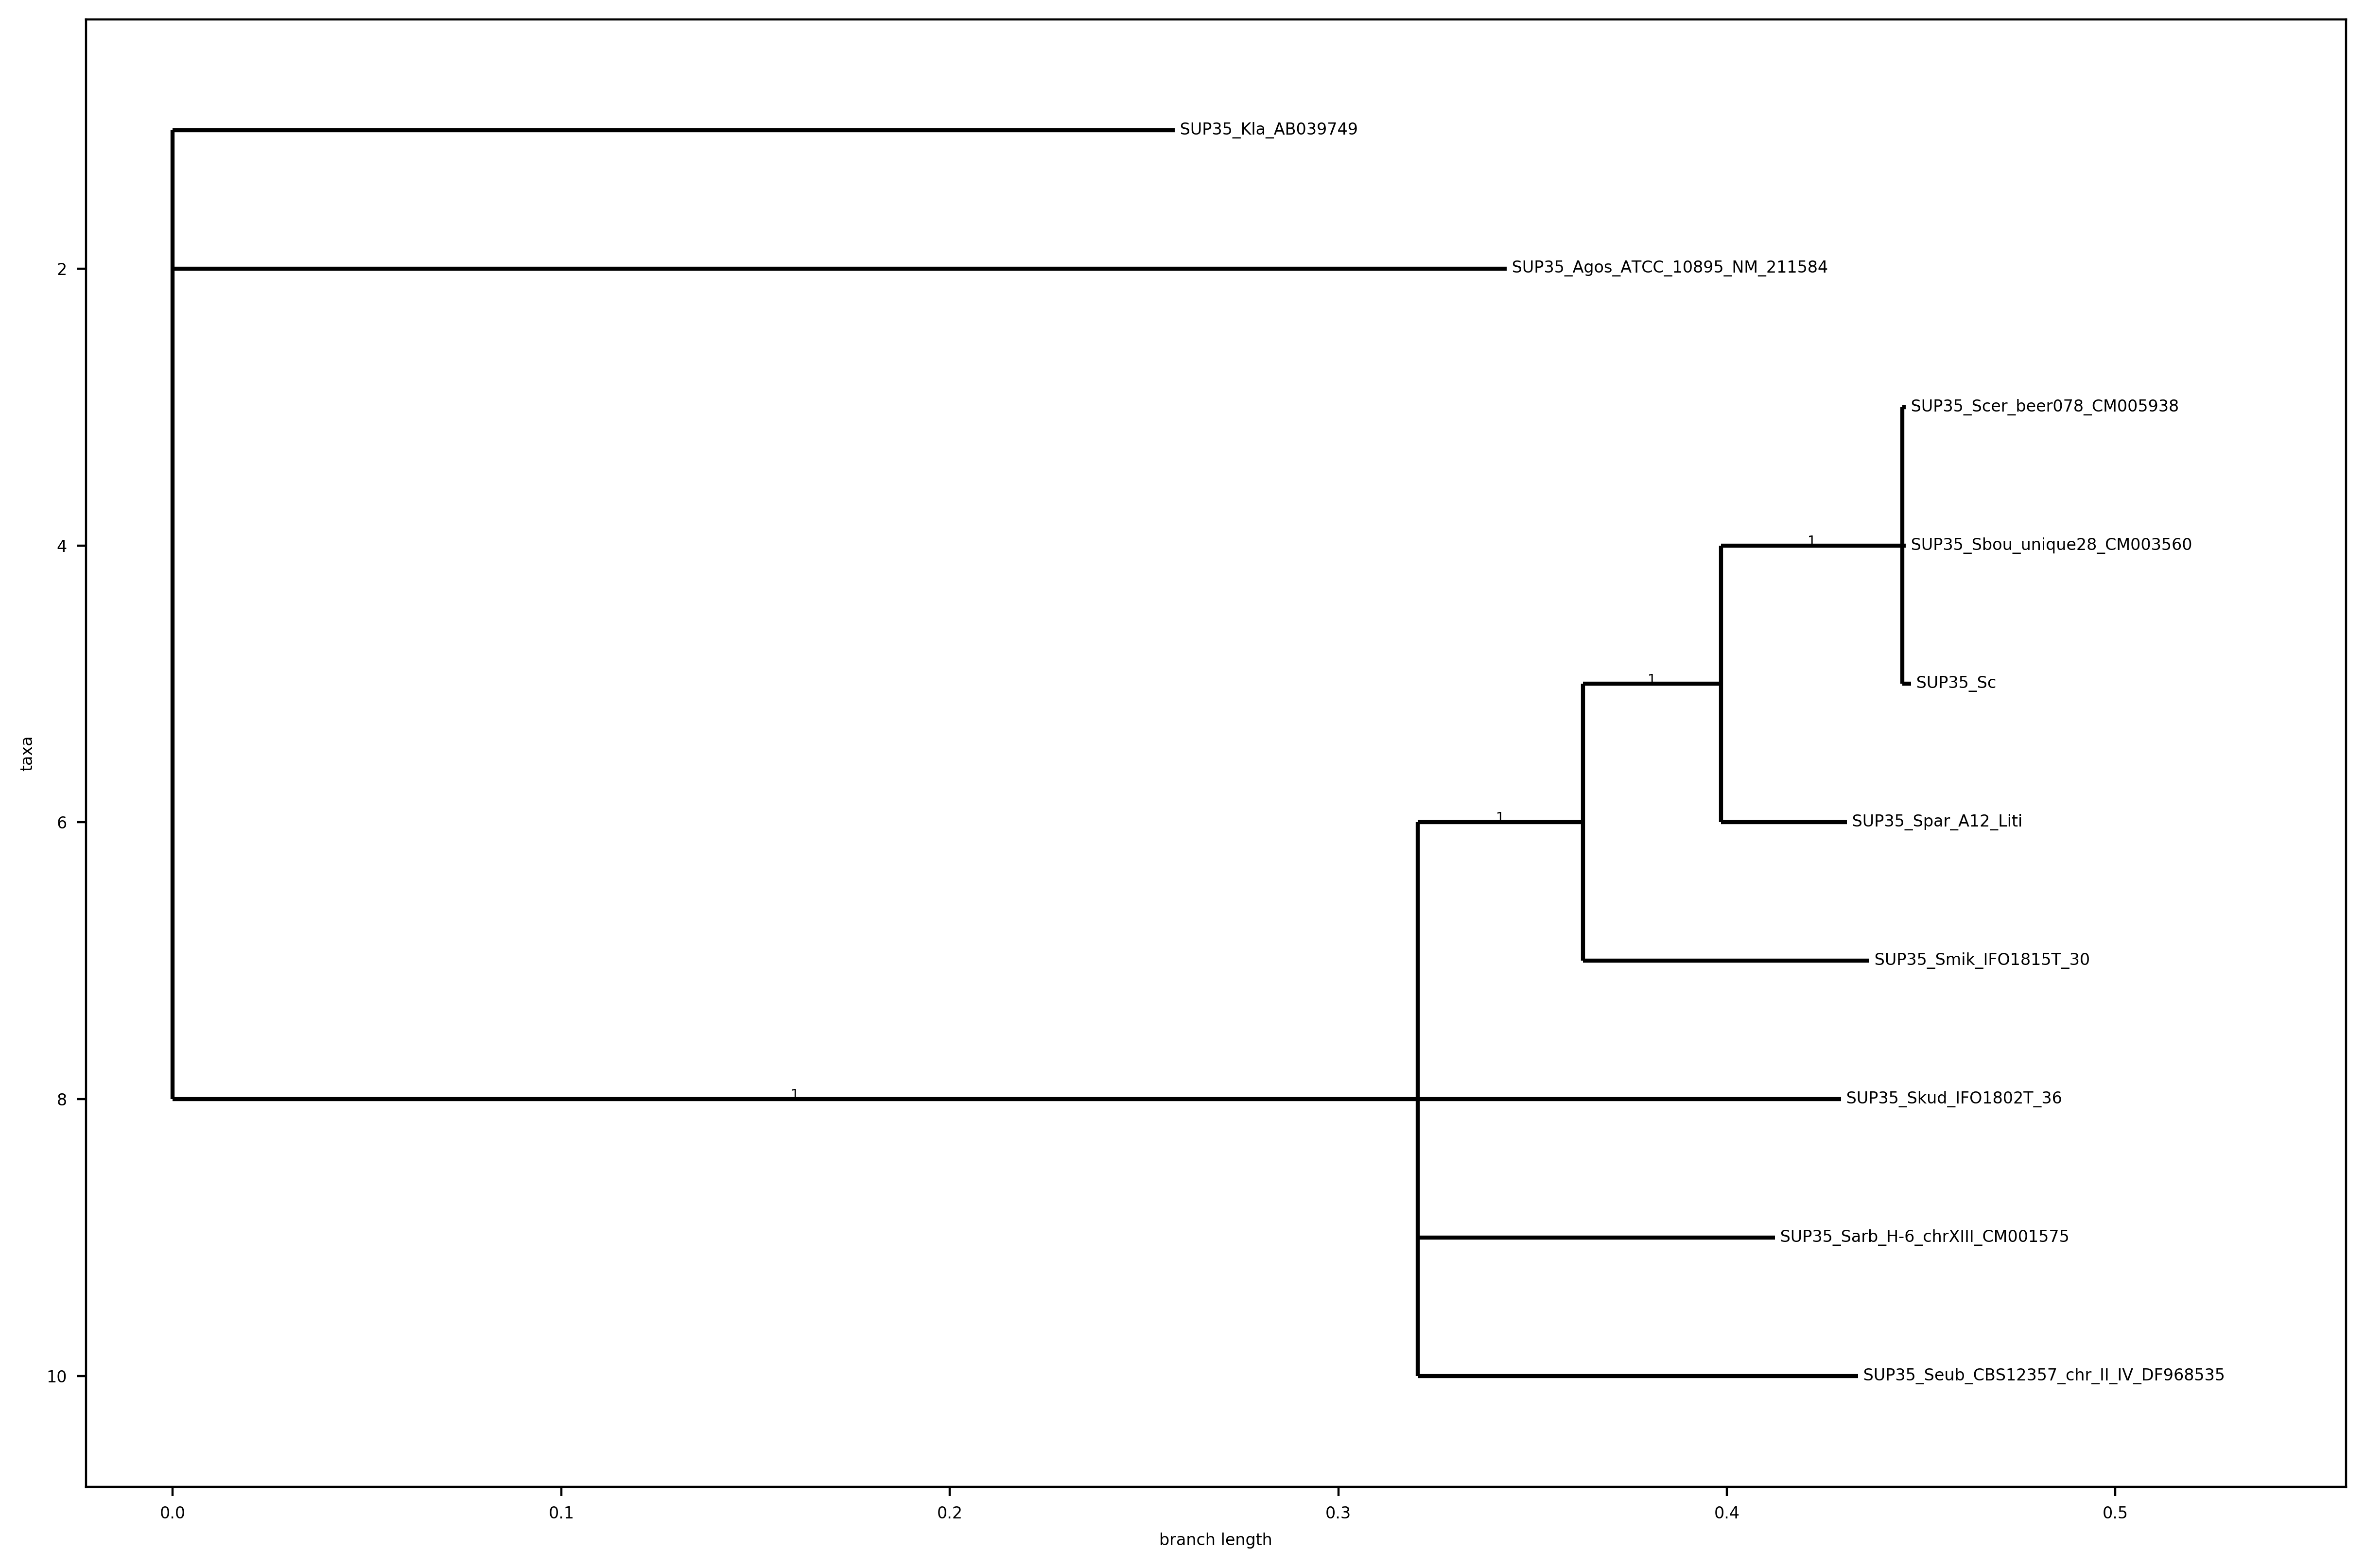

In [36]:
collapsed_MrBayse2 = Phylo.read('/home/sedreh/ITMO/semester3/Molecular_phylogenetic/homework_5/homework_5/MrBase/collapsed_rooted_MrBayse_80.nwk', 'newick')
matplotlib.rc('font', size=6) # set the size of the figure
fig = plt.figure(figsize=(15, 10), dpi=400)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(collapsed_MrBayse2, axes=axes)

### 3) Is the chain converged (standard deviation of split frequencies <0.01)? If not, how many generations did it take for the chain to reach the convergence?



### for part 2 of home work I have used MrBayse online version. Standard deviation till 10 generation was between 0.129448- 0.017060 but in generation 10 based on log pdf file that attached was 0.006784!

#####  Summary statistics for partitions with frequency >= 0.10 in at least one run:
          Average standard deviation of split frequencies = 0.005098
          Maximum standard deviation of split frequencies = 0.016026
          Average PSRF for parameter values (excluding NA and >10.0) = 1.001
          Maximum PSRF for parameter values = 1.002


### 6) At what bootstrap / posterior probability values cutoff the topology of trees from ​ A. and
B.​ will match?

#The topology of tree  after collapsing less than 80% is the same as collapsed IQtree!